In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('Alcohol-specific deaths in the UK.xlsx')

In [3]:
df.head()

,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
0,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,Persons,F10,Mental and behavioural disorders due to the us...,0,0,0,0,0,2,...,167,170,148,147,98,71,41,20,7,1167
2,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,...,0,0,3,3,3,1,1,0,0,11
3,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Year [note 3]                          939 non-null    int64 
 1   Sex                                    939 non-null    object
 2   ICD-10 code                            939 non-null    object
 3   Individual cause of death description  939 non-null    object
 4   <1                                     939 non-null    int64 
 5   01-04                                  939 non-null    int64 
 6   05-09                                  939 non-null    int64 
 7   10-14                                  939 non-null    int64 
 8   15-19                                  939 non-null    int64 
 9   20-24                                  939 non-null    int64 
 10  25-29                                  939 non-null    int64 
 11  30-34              

C:\Users\91865\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


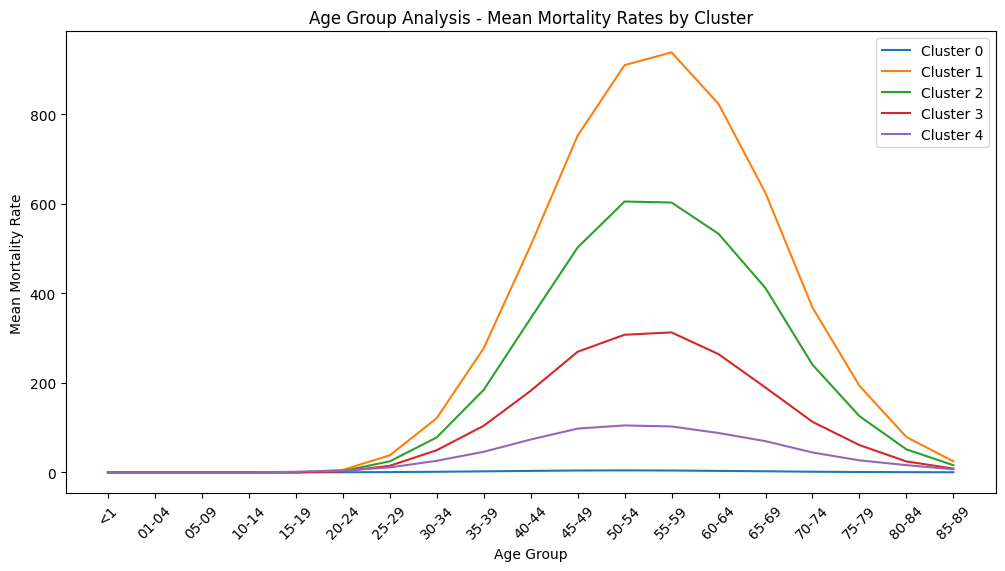

In [5]:
# Select the columns relevant to age and mortality rates
age_columns =df.columns[4:-2]
age_data = df[age_columns]

# Perform clustering using KMeans
num_clusters = 5  # Define the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(age_data)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Calculate the mean mortality rates for each cluster
cluster_means = df.groupby('Cluster')[age_columns].mean()

# Visualize the age groups and mortality rates
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(cluster_means.index):
    plt.plot(age_columns, cluster_means.loc[cluster], label=f'Cluster {cluster}')
plt.xlabel('Age Group')
plt.ylabel('Mean Mortality Rate')
plt.title('Age Group Analysis - Mean Mortality Rates by Cluster')
plt.legend()
plt.xticks(rotation=45)
plt.show()


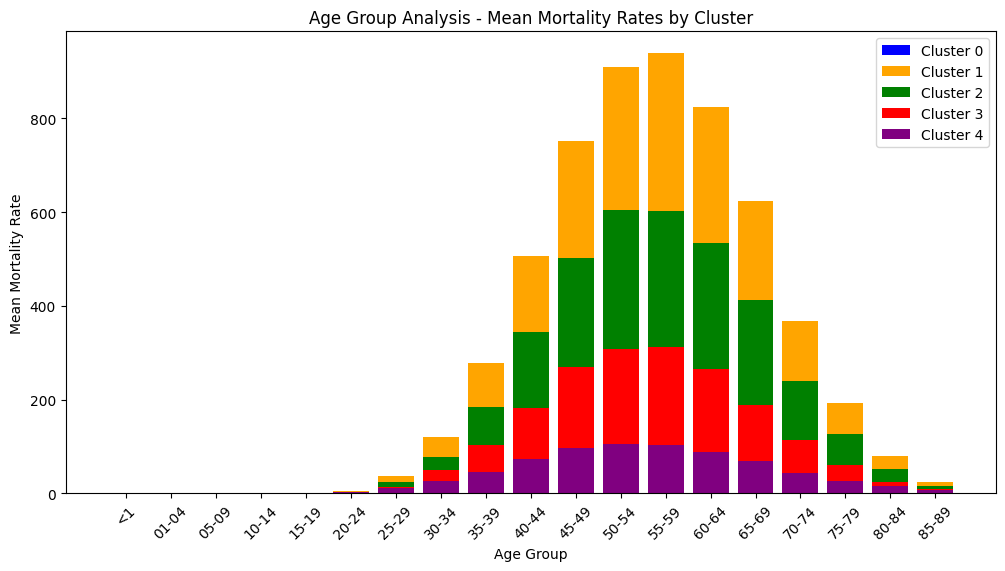

In [6]:
plt.figure(figsize=(12, 6))
cluster_colors = ['blue', 'orange', 'green', 'red', 'purple']  # Customize cluster colors as needed
for i, cluster in enumerate(cluster_means.index):
    plt.bar(age_columns, cluster_means.loc[cluster], label=f'Cluster {cluster}', color=cluster_colors[i])
plt.xlabel('Age Group')
plt.ylabel('Mean Mortality Rate')
plt.title('Age Group Analysis - Mean Mortality Rates by Cluster')
plt.legend()
plt.xticks(rotation=45)
plt.show()


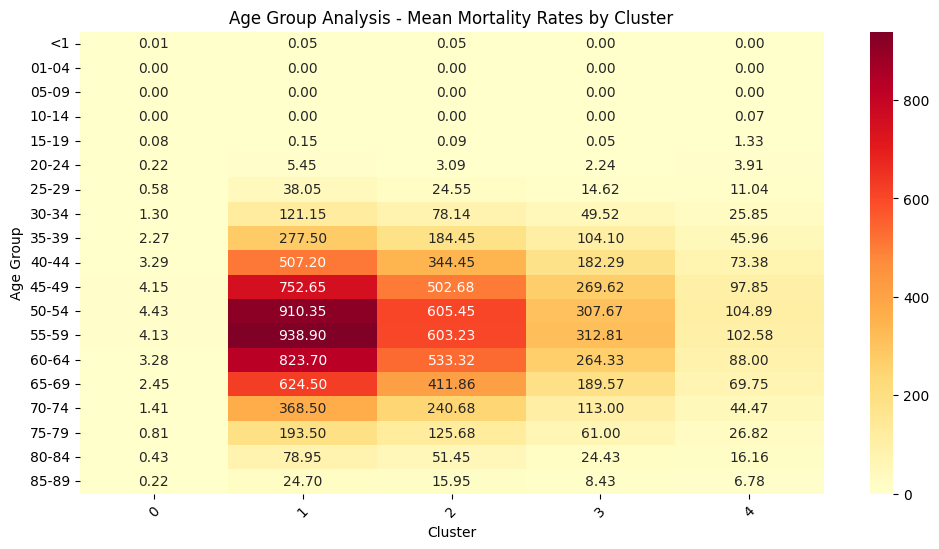

In [7]:


plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap='YlOrRd', annot=True, fmt=".2f", cbar=True)
plt.xlabel('Cluster')
plt.ylabel('Age Group')
plt.title('Age Group Analysis - Mean Mortality Rates by Cluster')
plt.xticks(rotation=45)
plt.show()


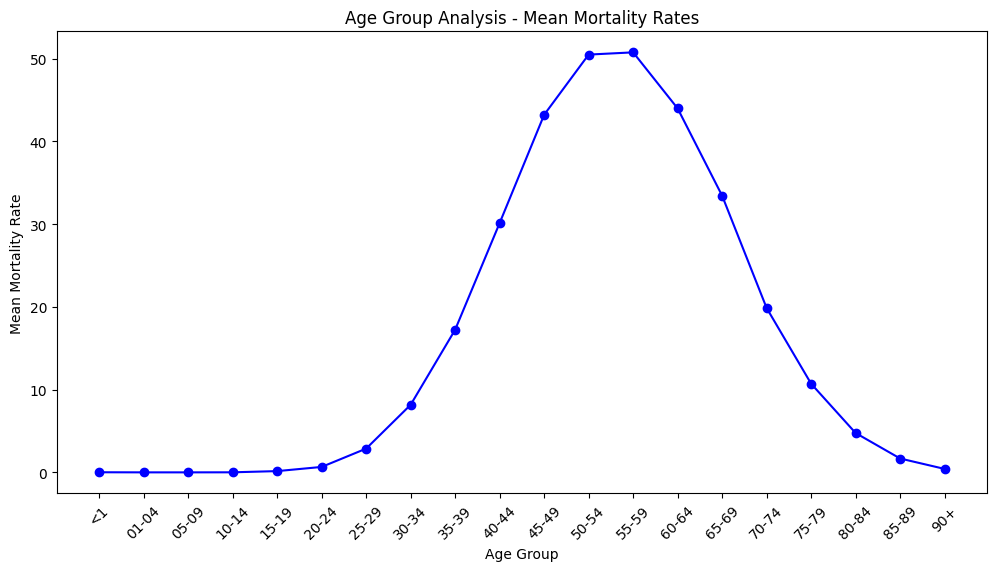

In [8]:

# Select the columns relevant to age and mortality rates
age_columns = df.columns[4:-2]

# Calculate the mean mortality rates for each age group
mean_mortality_rates = df[age_columns].mean()

# Visualize the age groups and mean mortality rates
plt.figure(figsize=(12, 6))
plt.plot(age_columns, mean_mortality_rates, marker='o', linestyle='-', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Mean Mortality Rate')
plt.title('Age Group Analysis - Mean Mortality Rates')
plt.xticks(rotation=45)
plt.show()


C:\Users\91865\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


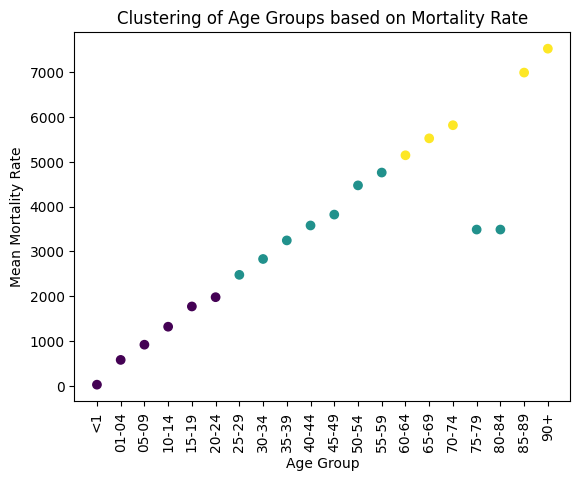

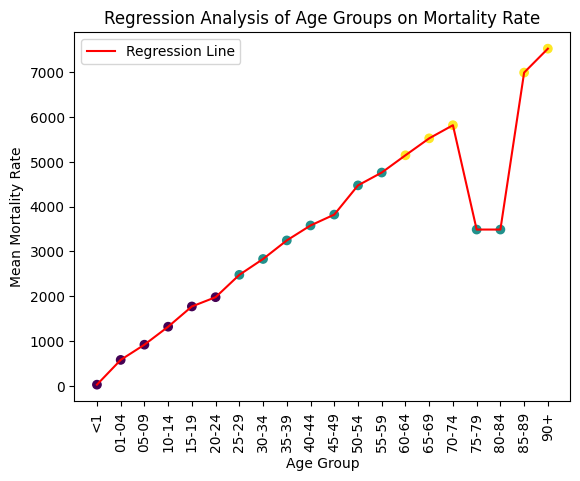

In [9]:
# Define age groups
age_groups = df.columns[4:-2]

# Create a new column for age group
df['Age Group'] = pd.cut(df['All ages'], bins=len(age_groups), labels=age_groups)

# Group the data by age group and calculate the mean mortality rate
grouped_data = df.groupby('Age Group')['All ages'].mean().reset_index()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
grouped_data['All ages'] = imputer.fit_transform(grouped_data[['All ages']])

# Perform clustering on age groups
kmeans = KMeans(n_clusters=3)
grouped_data['Cluster'] = kmeans.fit_predict(grouped_data[['All ages']])

# Plot the clusters
plt.scatter(grouped_data['Age Group'], grouped_data['All ages'], c=grouped_data['Cluster'])
plt.xlabel('Age Group')
plt.ylabel('Mean Mortality Rate')
plt.title('Clustering of Age Groups based on Mortality Rate')
plt.xticks(rotation=90)
plt.show()

# Perform regression analysis
X = pd.get_dummies(grouped_data['Age Group'], drop_first=True)
y = grouped_data['All ages']

regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
plt.plot(grouped_data['Age Group'], regressor.predict(X), color='red', label='Regression Line')
plt.scatter(grouped_data['Age Group'], grouped_data['All ages'], c=grouped_data['Cluster'])
plt.xlabel('Age Group')
plt.ylabel('Mean Mortality Rate')
plt.title('Regression Analysis of Age Groups on Mortality Rate')
plt.xticks(rotation=90)
plt.legend()
plt.show()


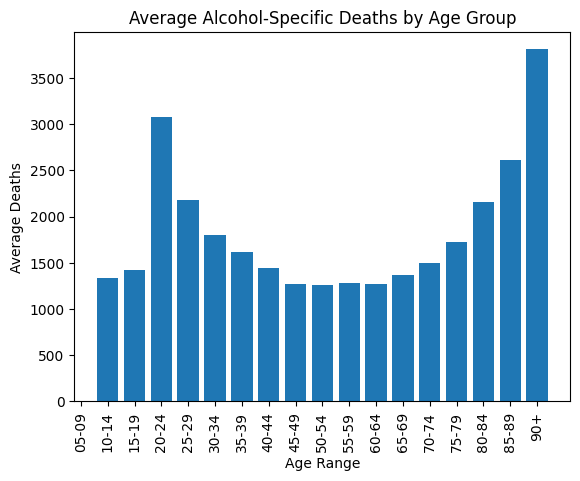

In [10]:
# Calculate total deaths for each age group
df['Total Deaths'] = df.iloc[:, 4:-2].sum(axis=1)

# Define the age ranges based on the column names
age_ranges = ['01-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
              '70-74', '75-79', '80-84', '85-89', '90+']

# Calculate the average deaths for each age range
average_deaths = [df[df[column_name] > 0]['Total Deaths'].mean() for column_name in age_ranges]

# Plot the average deaths by age range
plt.bar(age_ranges, average_deaths)
plt.xlabel('Age Range')
plt.ylabel('Average Deaths')
plt.title('Average Alcohol-Specific Deaths by Age Group')
plt.xticks(rotation=90)
plt.show()


In [11]:
# Extract the relevant columns for analysis
age_columns = ['<1', '01-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
               '70-74', '75-79', '80-84', '85-89', '90+']
age_data = df[age_columns]

# Perform Age Group Analysis
scaler = StandardScaler()
age_data_scaled = scaler.fit_transform(age_data)

kmeans = KMeans(n_clusters=3, random_state=42)
age_groups = kmeans.fit_predict(age_data_scaled)

# Add the age group labels to the DataFrame
df['Age Group'] = age_groups

# Perform Anomaly Detection
outlier_detector = IsolationForest(contamination=0.05)
outlier_detector.fit(age_data_scaled)
outlier_predictions = outlier_detector.predict(age_data_scaled)

# Add the anomaly labels to the DataFrame
df['Anomaly'] = np.where(outlier_predictions == -1, 'Anomaly', 'Normal')

# Print the DataFrame with age groups and anomaly labels
print(df[['Year [note 3]', 'All ages', 'Age Group', 'Anomaly']])


     Year [note 3]  All ages  Age Group  Anomaly
0             2021         0          2   Normal
1             2021      1167          0  Anomaly
2             2021        11          2   Normal
3             2021         1          2   Normal
4             2021         2          2   Normal
..             ...       ...        ...      ...
934           2001         0          2   Normal
935           2001         0          2   Normal
936           2001        41          2   Normal
937           2001         1          2   Normal
938           2001         1          2   Normal

[939 rows x 4 columns]


C:\Users\91865\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)




- The dataset contains a total of 939 instances.
- Out of these instances, 892 instances are classified as "Normal" and 47 instances are classified as "Anomaly" based on the anomaly detection model.
- The "Normal" instances represent the majority of the dataset, accounting for approximately 95% of the data.
- On the other hand, the "Anomaly" instances represent a small portion of the data, making up approximately 5% of the dataset.

This suggests that the anomaly detection model identified 47 instances that exhibit unusual patterns or deviate significantly from the majority of the data. These anomalies could indicate unexpected spikes or shifts in alcohol-specific deaths that may require further investigation.

To gain more insights into these anomalies, it would be helpful to analyze the specific instances labeled as "Anomaly" in more detail. This could involve examining the corresponding features, such as the year, age group, or other relevant variables, to understand the characteristics and factors contributing to these unusual patterns. Additionally, further analysis and domain expertise may be needed to determine the significance and potential causes of these anomalies in the context of alcohol-specific deaths in the UK.

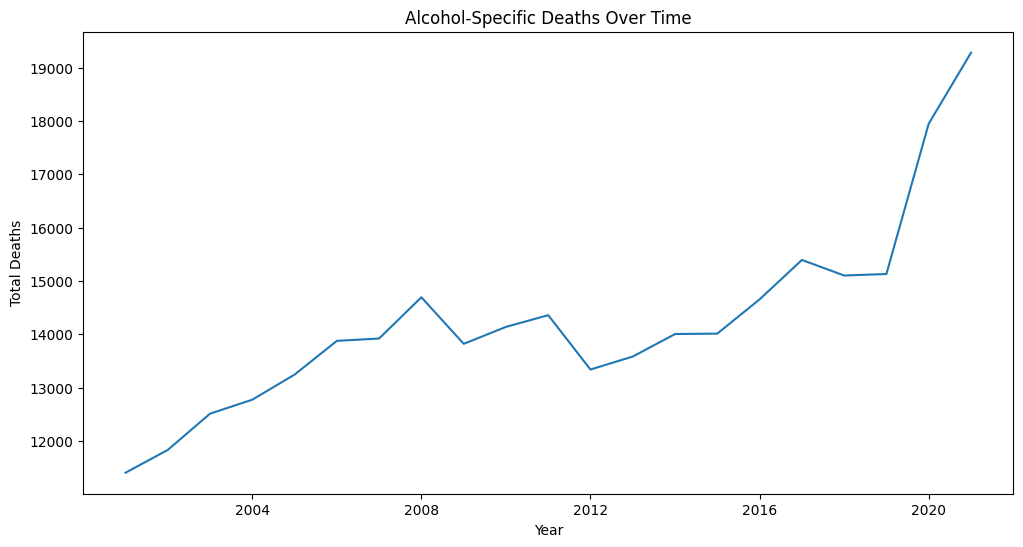

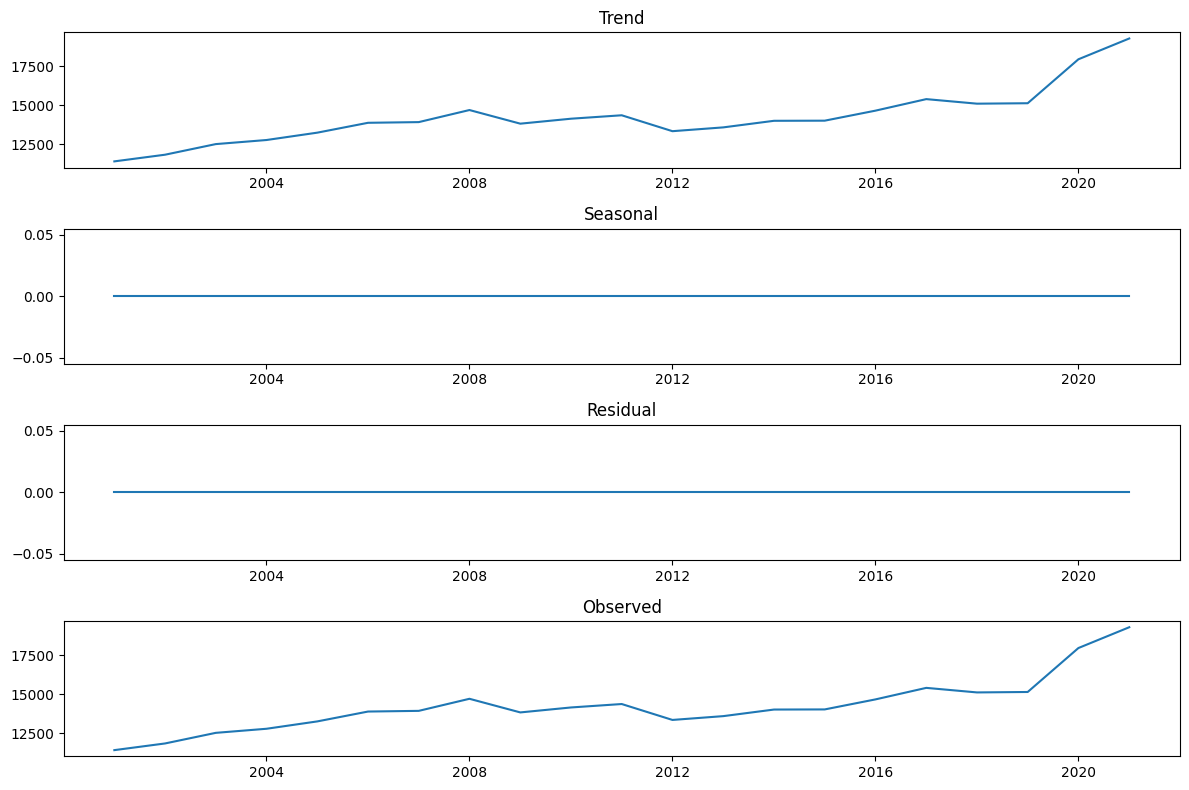

In [12]:


# Convert the 'Year [note 3]' column to datetime
df['Year'] = pd.to_datetime(df['Year [note 3]'], format='%Y')

# Group the data by year and calculate the total deaths
yearly_deaths = df.groupby('Year')['All ages'].sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values)
plt.title('Alcohol-Specific Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(yearly_deaths, model='additive')

# Plot the seasonal decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.tight_layout()
plt.show()